<a href="https://colab.research.google.com/github/Shirshchauhan/Bharat-Intern/blob/main/BHARAT_INTERN_TASK_3_NUMBER_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BY - Shirsh Chauhan
Handwritten digit recognition using MNIST dataset to detect the scanned images of handwritten digits

In [1]:
import torch
import torchvision
from torch import nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

Load the MNIST dataset

In [2]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 150713083.61it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 20608318.11it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 72619219.79it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15475652.94it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Visualize Some images

In [3]:
def show_images(images, labels, label_header="True"):
    figure = plt.figure(figsize=(10, 10))
    rows, cols = 5, 5
    for i in range(1, rows*cols+1):
        figure.add_subplot(rows, cols, i)
        plt.axis(False)
        plt.title(f"{label_header}: {labels[i-1].item()}")
        plt.imshow(images[i-1].permute(1,2,0), cmap='gray')

    plt.show()

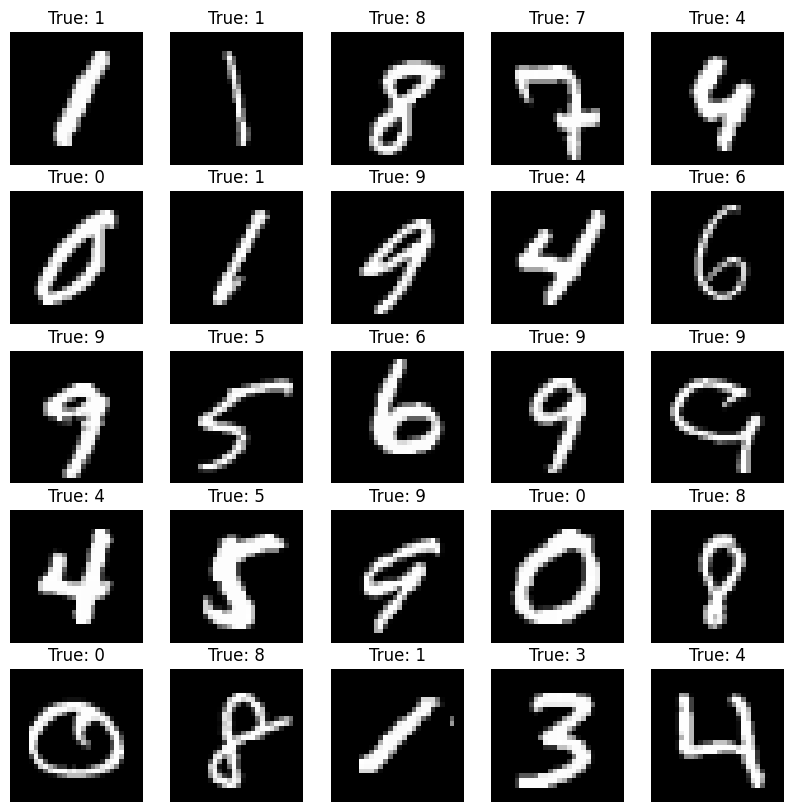

In [4]:
images, labels = next(iter(trainloader))
show_images(images, labels)

Define the CNN model

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)

        return x

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Initialize the model, loss function, and optimizer

In [7]:
net = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Training the CNN

In [8]:
for epoch in range(5):
    running_loss = 0.0
    for idx, (inputs, labels) in tqdm(enumerate(trainloader), total=len(trainloader)):

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch: {epoch + 1}, Loss: {running_loss / 100:.3f}')

print('Training Finished!')

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 1, Loss: 8.325


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 2, Loss: 2.613


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 3, Loss: 1.839


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 4, Loss: 1.386


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 5, Loss: 1.128
Training Finished!


Evaluating the CNN on test data

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for (images, labels) in testloader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        predicted = outputs.argmax(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

Accuracy on test set: 97.02%


Test on some images

In [10]:
images, labels = next(iter(testloader))
with torch.no_grad():
    pred = net(images.to(device))
    pred = pred.argmax(1)

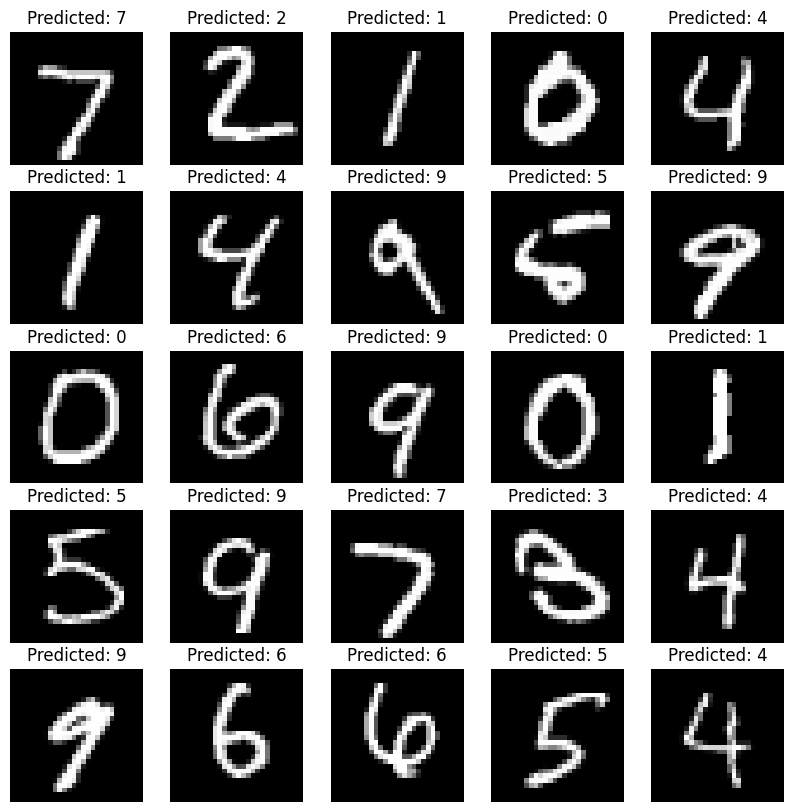

In [11]:
show_images(images, pred, "Predicted")
